### Load tensorflow

In [80]:
import tensorflow as tf

### Collect Data

In [81]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
demo = pd.read_csv("diabetes.csv")
X=demo.drop('Outcome',axis=1)
X = demo[["Glucose","BMI","Age"]]
y=demo['Outcome']
demo.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
rf.fit(X,y)
gb.fit(X,y)
print(gb.feature_importances_)
print(rf.feature_importances_)

[0.05262113 0.40746366 0.0366062  0.01784501 0.04947083 0.19419593
 0.10573226 0.13606499]
[0.08781563 0.26059668 0.09344781 0.0696216  0.06964478 0.16139293
 0.12514668 0.13233391]


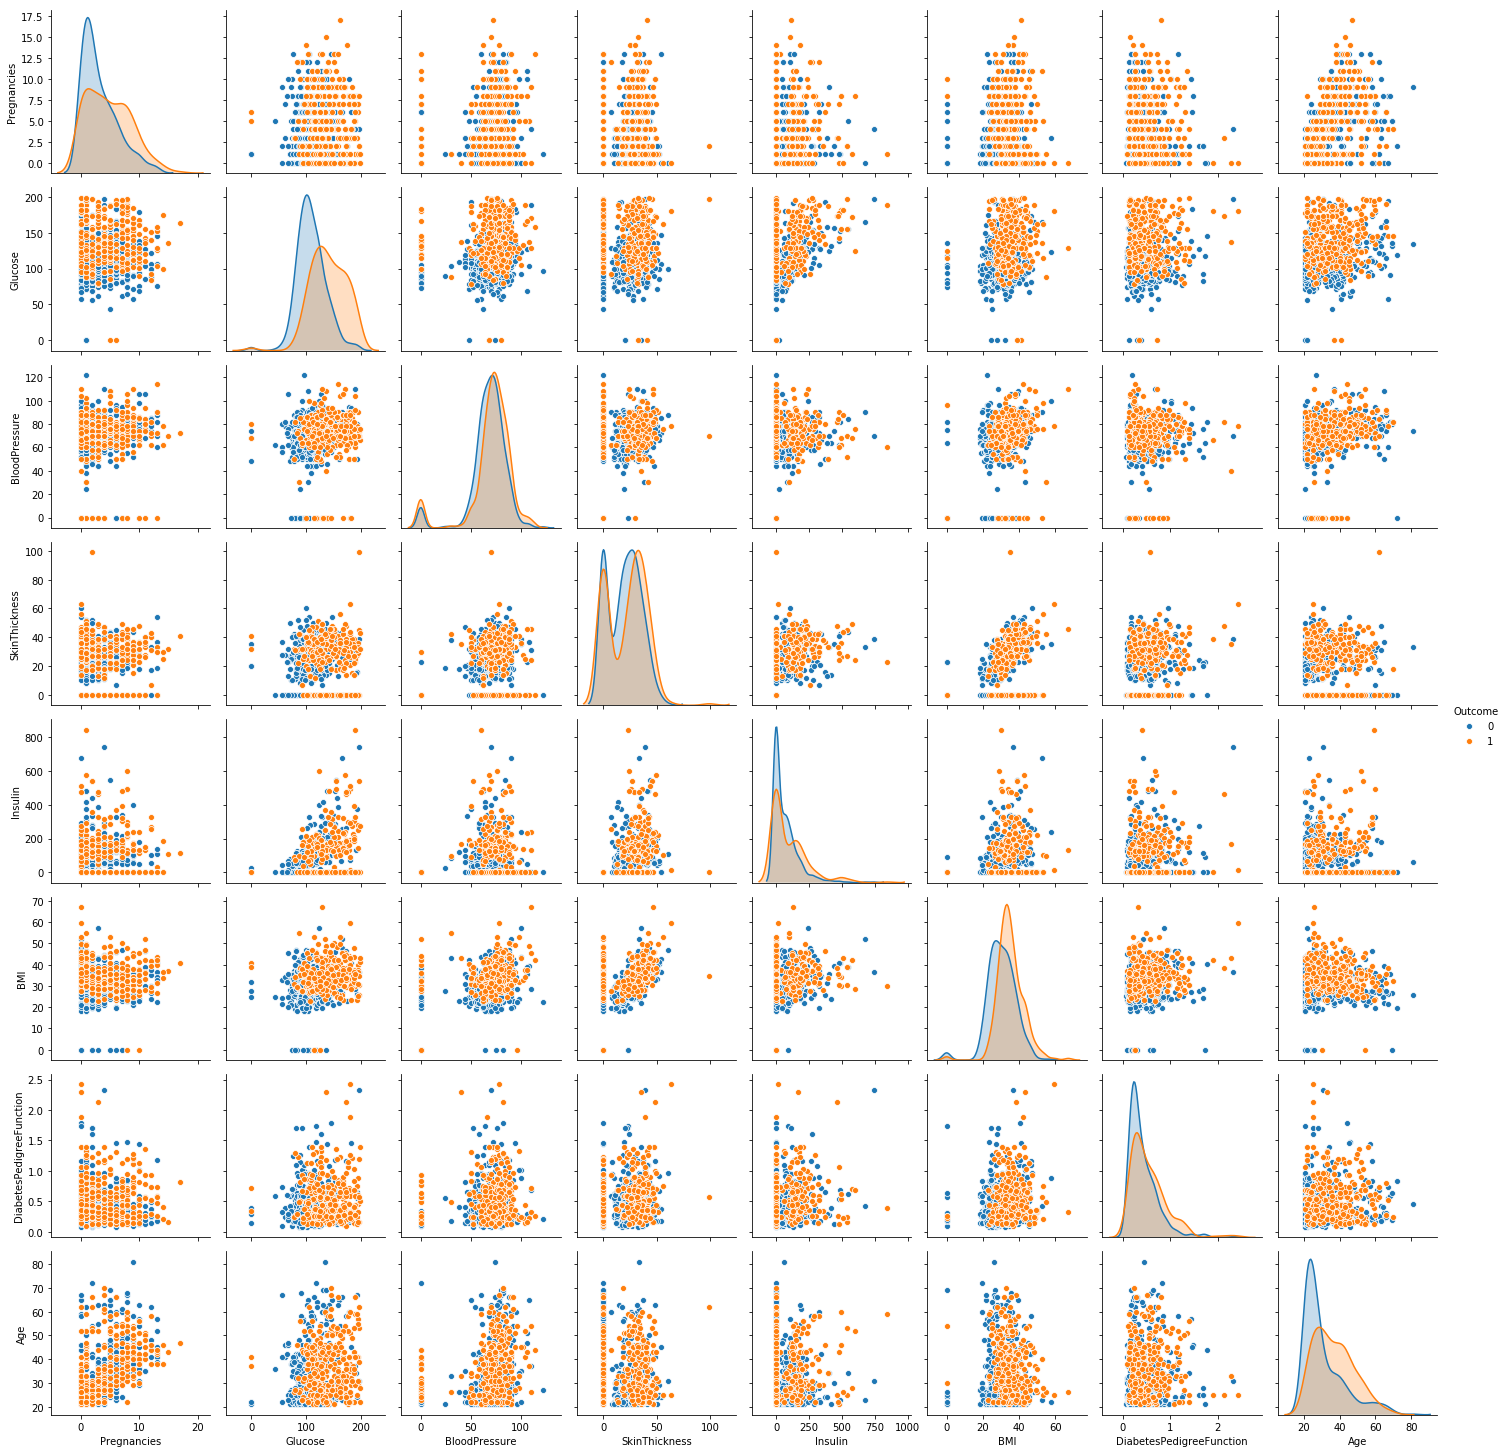

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde',hue="Outcome")

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

## Build the Graph

In [83]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((3,),input_shape=(3,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

## Build the Graph...

In [84]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [85]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [86]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [87]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [88]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

## Build the Graph...

In [89]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

## Train the model

In [90]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32)

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 1s 2ms/sample - loss: 0.6786 - accuracy: 0.6189 - val_loss: 0.7282 - val_accuracy: 0.3896
Epoch 2/100
614/614 [==============================] - 0s 102us/sample - loss: 0.5782 - accuracy: 0.6954 - val_loss: 0.7570 - val_accuracy: 0.3571
Epoch 3/100
614/614 [==============================] - 0s 96us/sample - loss: 0.5384 - accuracy: 0.7345 - val_loss: 0.7468 - val_accuracy: 0.3766
Epoch 4/100
614/614 [==============================] - 0s 118us/sample - loss: 0.5255 - accuracy: 0.7492 - val_loss: 0.7174 - val_accuracy: 0.4026
Epoch 5/100
614/614 [==============================] - 0s 128us/sample - loss: 0.4995 - accuracy: 0.7443 - val_loss: 0.6905 - val_accuracy: 0.4870
Epoch 6/100
614/614 [==============================] - 0s 88us/sample - loss: 0.5147 - accuracy: 0.7541 - val_loss: 0.6581 - val_accuracy: 0.6104
Epoch 7/100
614/614 [==============================] - 0s 103us/sample - los

In [ ]:
model.save('mnist_dnn_v1.h5')